In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('diabetes_dataset.csv')
df.head()

,age,gender,ethnicity,education_level,income_level,employment_status,smoking_status,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,...,hdl_cholesterol,ldl_cholesterol,triglycerides,glucose_fasting,glucose_postprandial,insulin_level,hba1c,diabetes_risk_score,diabetes_stage,diagnosed_diabetes
0,58,Male,Asian,Highschool,Lower-Middle,Employed,Never,0,215,5.7,...,41,160,145,136,236,6.36,8.18,29.6,Type 2,1
1,48,Female,White,Highschool,Middle,Employed,Former,1,143,6.7,...,55,50,30,93,150,2.00,5.63,23.0,No Diabetes,0
2,60,Male,Hispanic,Highschool,Middle,Unemployed,Never,1,57,6.4,...,66,99,36,118,195,5.07,7.51,44.7,Type 2,1
3,74,Female,Black,Highschool,Low,Retired,Never,0,49,3.4,...,50,79,140,139,253,5.28,9.03,38.2,Type 2,1
4,46,Male,White,Graduate,Middle,Retired,Never,1,109,7.2,...,52,125,160,137,184,12.74,7.20,23.5,Type 2,1


In [3]:
df = df.drop(['diabetes_stage', 'income_level', 'ethnicity', 'education_level', 'employment_status'], axis=1)
df.head()

,age,gender,smoking_status,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,family_history_diabetes,hypertension_history,...,cholesterol_total,hdl_cholesterol,ldl_cholesterol,triglycerides,glucose_fasting,glucose_postprandial,insulin_level,hba1c,diabetes_risk_score,diagnosed_diabetes
0,58,Male,Never,0,215,5.7,7.9,7.9,0,0,...,239,41,160,145,136,236,6.36,8.18,29.6,1
1,48,Female,Former,1,143,6.7,6.5,8.7,0,0,...,116,55,50,30,93,150,2.00,5.63,23.0,0
2,60,Male,Never,1,57,6.4,10.0,8.1,1,0,...,213,66,99,36,118,195,5.07,7.51,44.7,1
3,74,Female,Never,0,49,3.4,6.6,5.2,0,0,...,171,50,79,140,139,253,5.28,9.03,38.2,1
4,46,Male,Never,1,109,7.2,7.4,5.0,0,0,...,210,52,125,160,137,184,12.74,7.20,23.5,1


In [4]:
df.isnull().sum()

age                                   0
gender                                0
smoking_status                        0
alcohol_consumption_per_week          0
physical_activity_minutes_per_week    0
diet_score                            0
sleep_hours_per_day                   0
screen_time_hours_per_day             0
family_history_diabetes               0
hypertension_history                  0
cardiovascular_history                0
bmi                                   0
waist_to_hip_ratio                    0
systolic_bp                           0
diastolic_bp                          0
heart_rate                            0
cholesterol_total                     0
hdl_cholesterol                       0
ldl_cholesterol                       0
triglycerides                         0
glucose_fasting                       0
glucose_postprandial                  0
insulin_level                         0
hba1c                                 0
diabetes_risk_score                   0


In [5]:
df.shape

(100000, 26)

In [6]:
df.smoking_status.describe()

count     100000
unique         3
top        Never
freq       59813
Name: smoking_status, dtype: object

In [7]:
dummies = pd.get_dummies(df.gender)
dummies.head()

,Female,Male,Other
0,False,True,False
1,True,False,False
2,False,True,False
3,True,False,False
4,False,True,False


In [8]:
df = pd.concat([df, dummies], axis=1)
df.head()

,age,gender,smoking_status,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,family_history_diabetes,hypertension_history,...,triglycerides,glucose_fasting,glucose_postprandial,insulin_level,hba1c,diabetes_risk_score,diagnosed_diabetes,Female,Male,Other
0,58,Male,Never,0,215,5.7,7.9,7.9,0,0,...,145,136,236,6.36,8.18,29.6,1,False,True,False
1,48,Female,Former,1,143,6.7,6.5,8.7,0,0,...,30,93,150,2.00,5.63,23.0,0,True,False,False
2,60,Male,Never,1,57,6.4,10.0,8.1,1,0,...,36,118,195,5.07,7.51,44.7,1,False,True,False
3,74,Female,Never,0,49,3.4,6.6,5.2,0,0,...,140,139,253,5.28,9.03,38.2,1,True,False,False
4,46,Male,Never,1,109,7.2,7.4,5.0,0,0,...,160,137,184,12.74,7.20,23.5,1,False,True,False


In [9]:
df = df.drop(['gender', 'Other'], axis=1)
df.head()

,age,smoking_status,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,family_history_diabetes,hypertension_history,cardiovascular_history,...,ldl_cholesterol,triglycerides,glucose_fasting,glucose_postprandial,insulin_level,hba1c,diabetes_risk_score,diagnosed_diabetes,Female,Male
0,58,Never,0,215,5.7,7.9,7.9,0,0,0,...,160,145,136,236,6.36,8.18,29.6,1,False,True
1,48,Former,1,143,6.7,6.5,8.7,0,0,0,...,50,30,93,150,2.00,5.63,23.0,0,True,False
2,60,Never,1,57,6.4,10.0,8.1,1,0,0,...,99,36,118,195,5.07,7.51,44.7,1,False,True
3,74,Never,0,49,3.4,6.6,5.2,0,0,0,...,79,140,139,253,5.28,9.03,38.2,1,True,False
4,46,Never,1,109,7.2,7.4,5.0,0,0,0,...,125,160,137,184,12.74,7.20,23.5,1,False,True


In [10]:
dummies = pd.get_dummies(df.smoking_status)
dummies.head()

,Current,Former,Never
0,False,False,True
1,False,True,False
2,False,False,True
3,False,False,True
4,False,False,True


In [11]:
df = pd.concat([df, dummies], axis=1)
df.head()

,age,smoking_status,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,family_history_diabetes,hypertension_history,cardiovascular_history,...,glucose_postprandial,insulin_level,hba1c,diabetes_risk_score,diagnosed_diabetes,Female,Male,Current,Former,Never
0,58,Never,0,215,5.7,7.9,7.9,0,0,0,...,236,6.36,8.18,29.6,1,False,True,False,False,True
1,48,Former,1,143,6.7,6.5,8.7,0,0,0,...,150,2.00,5.63,23.0,0,True,False,False,True,False
2,60,Never,1,57,6.4,10.0,8.1,1,0,0,...,195,5.07,7.51,44.7,1,False,True,False,False,True
3,74,Never,0,49,3.4,6.6,5.2,0,0,0,...,253,5.28,9.03,38.2,1,True,False,False,False,True
4,46,Never,1,109,7.2,7.4,5.0,0,0,0,...,184,12.74,7.20,23.5,1,False,True,False,False,True


In [12]:
df = df.drop(['smoking_status', 'Never'], axis=1)
df.head()

,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,family_history_diabetes,hypertension_history,cardiovascular_history,bmi,...,glucose_fasting,glucose_postprandial,insulin_level,hba1c,diabetes_risk_score,diagnosed_diabetes,Female,Male,Current,Former
0,58,0,215,5.7,7.9,7.9,0,0,0,30.5,...,136,236,6.36,8.18,29.6,1,False,True,False,False
1,48,1,143,6.7,6.5,8.7,0,0,0,23.1,...,93,150,2.00,5.63,23.0,0,True,False,False,True
2,60,1,57,6.4,10.0,8.1,1,0,0,22.2,...,118,195,5.07,7.51,44.7,1,False,True,False,False
3,74,0,49,3.4,6.6,5.2,0,0,0,26.8,...,139,253,5.28,9.03,38.2,1,True,False,False,False
4,46,1,109,7.2,7.4,5.0,0,0,0,21.2,...,137,184,12.74,7.20,23.5,1,False,True,False,False


In [13]:
df.age.describe()

count    100000.00000
mean         50.12041
std          15.60460
min          18.00000
25%          39.00000
50%          50.00000
75%          61.00000
max          90.00000
Name: age, dtype: float64

In [14]:
df.physical_activity_minutes_per_week.describe()

count    100000.000000
mean        118.911640
std          84.409662
min           0.000000
25%          57.000000
50%         100.000000
75%         160.000000
max         833.000000
Name: physical_activity_minutes_per_week, dtype: float64

In [15]:
df.sleep_hours_per_day.describe()

count    100000.000000
mean          6.997818
std           1.094622
min           3.000000
25%           6.300000
50%           7.000000
75%           7.700000
max          10.000000
Name: sleep_hours_per_day, dtype: float64

In [16]:
df.screen_time_hours_per_day.describe()

count    100000.000000
mean          5.996468
std           2.468406
min           0.500000
25%           4.300000
50%           6.000000
75%           7.700000
max          16.800000
Name: screen_time_hours_per_day, dtype: float64

In [17]:
high_limit = df.screen_time_hours_per_day.mean() + 2*df.screen_time_hours_per_day.std()
high_limit

np.float64(10.933280111175097)

In [18]:
df[df.screen_time_hours_per_day > high_limit]

,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,family_history_diabetes,hypertension_history,cardiovascular_history,bmi,...,glucose_fasting,glucose_postprandial,insulin_level,hba1c,diabetes_risk_score,diagnosed_diabetes,Female,Male,Current,Former
7,62,1,75,4.1,9.0,12.9,0,1,1,23.9,...,110,189,8.96,7.04,34.2,1,False,True,True,False
167,80,4,132,5.2,8.3,11.4,0,0,0,25.2,...,131,214,12.76,8.25,36.8,1,True,False,False,False
206,58,5,245,5.4,7.9,11.3,0,1,0,24.2,...,92,131,7.13,5.08,24.9,1,True,False,False,False
234,84,1,119,6.9,10.0,12.4,0,0,0,26.5,...,121,170,14.69,6.34,39.7,0,True,False,True,False
323,83,2,85,5.6,5.9,12.5,0,0,0,29.7,...,122,178,19.20,6.54,39.9,1,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99810,50,0,183,8.5,7.1,11.0,1,0,0,23.3,...,109,144,8.18,6.23,37.6,0,False,True,True,False
99849,43,2,178,7.1,6.6,11.2,0,1,0,19.7,...,107,141,5.05,6.19,19.7,0,True,False,False,False
99852,22,1,163,4.2,6.4,11.1,0,0,0,25.1,...,121,148,10.11,6.15,19.7,0,True,False,False,False
99860,58,0,118,5.3,5.5,11.4,0,0,0,28.6,...,112,131,19.33,5.94,32.1,0,False,True,False,False


In [19]:
low_limit = df.screen_time_hours_per_day.mean() - 2*df.screen_time_hours_per_day.std()
low_limit

np.float64(1.0596558888249001)

In [20]:
df.screen_time_hours_per_day < low_limit

0        False
1        False
2        False
3        False
4        False
         ...  
99995    False
99996    False
99997    False
99998     True
99999    False
Name: screen_time_hours_per_day, Length: 100000, dtype: bool

In [21]:
df = df[~(df.screen_time_hours_per_day > high_limit)]
df.shape

(97609, 28)

In [22]:
df = df[~(df.screen_time_hours_per_day < low_limit)]
df.shape

(95201, 28)

In [23]:
df[df.screen_time_hours_per_day < low_limit]

,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,family_history_diabetes,hypertension_history,cardiovascular_history,bmi,...,glucose_fasting,glucose_postprandial,insulin_level,hba1c,diabetes_risk_score,diagnosed_diabetes,Female,Male,Current,Former


In [24]:
df.head()

,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,family_history_diabetes,hypertension_history,cardiovascular_history,bmi,...,glucose_fasting,glucose_postprandial,insulin_level,hba1c,diabetes_risk_score,diagnosed_diabetes,Female,Male,Current,Former
0,58,0,215,5.7,7.9,7.9,0,0,0,30.5,...,136,236,6.36,8.18,29.6,1,False,True,False,False
1,48,1,143,6.7,6.5,8.7,0,0,0,23.1,...,93,150,2.00,5.63,23.0,0,True,False,False,True
2,60,1,57,6.4,10.0,8.1,1,0,0,22.2,...,118,195,5.07,7.51,44.7,1,False,True,False,False
3,74,0,49,3.4,6.6,5.2,0,0,0,26.8,...,139,253,5.28,9.03,38.2,1,True,False,False,False
4,46,1,109,7.2,7.4,5.0,0,0,0,21.2,...,137,184,12.74,7.20,23.5,1,False,True,False,False


In [25]:
df.bmi.describe()

count    95201.000000
mean        25.617047
std          3.587035
min         15.000000
25%         23.200000
50%         25.600000
75%         28.000000
max         39.200000
Name: bmi, dtype: float64

In [26]:
df[df.bmi>35]

,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,family_history_diabetes,hypertension_history,cardiovascular_history,bmi,...,glucose_fasting,glucose_postprandial,insulin_level,hba1c,diabetes_risk_score,diagnosed_diabetes,Female,Male,Current,Former
311,68,3,43,6.1,8.1,9.2,1,1,0,37.8,...,132,201,12.61,7.22,60.5,1,True,False,False,False
765,39,2,97,4.8,6.8,5.2,0,0,0,38.2,...,107,149,17.68,6.08,34.0,0,False,True,False,False
1059,44,2,64,6.1,6.6,10.2,0,0,0,36.1,...,108,170,11.44,6.85,35.0,1,False,True,True,False
1130,55,2,209,5.2,6.7,10.9,0,1,0,35.5,...,119,148,14.23,6.42,31.1,0,False,True,False,True
1282,61,5,242,6.3,8.6,5.1,0,0,0,36.1,...,110,134,12.58,5.93,29.7,0,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98591,64,1,195,5.6,7.1,3.9,1,0,0,36.4,...,107,141,10.70,5.79,47.7,0,False,True,False,False
98605,45,1,28,3.9,8.2,6.8,0,1,0,35.3,...,114,168,12.25,6.87,38.2,1,False,True,False,True
99054,87,2,51,5.1,6.1,4.9,0,0,0,37.8,...,130,212,15.63,7.88,47.1,1,False,True,False,True
99316,70,2,66,5.1,7.9,7.4,0,0,0,36.0,...,137,195,18.38,7.73,41.2,1,False,True,True,False


In [27]:
high_limit = df.bmi.mean() + 3*df.bmi.std()
high_limit

np.float64(36.37815354638755)

In [28]:
low_limit = df.bmi.mean() - 3*df.bmi.std()
low_limit

np.float64(14.855940633295436)

(array([   88.,   621.,  2881.,  8584., 17273., 23467., 21308., 13311.,
         5769.,  1899.]),
 array([ 3. ,  3.7,  4.4,  5.1,  5.8,  6.5,  7.2,  7.9,  8.6,  9.3, 10. ]),
 <BarContainer object of 10 artists>)

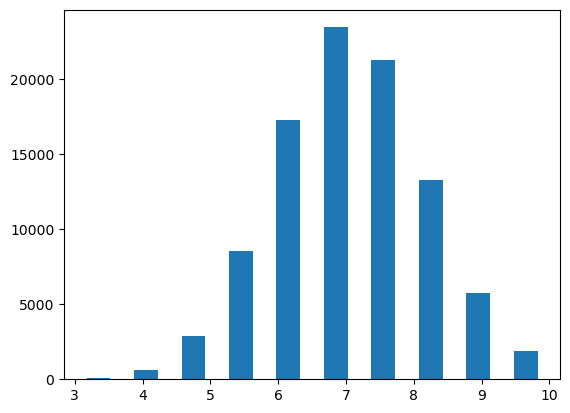

In [29]:
plt.hist(df.sleep_hours_per_day, rwidth=0.5)

In [30]:
df[df.bmi < low_limit]

,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,family_history_diabetes,hypertension_history,cardiovascular_history,bmi,...,glucose_fasting,glucose_postprandial,insulin_level,hba1c,diabetes_risk_score,diagnosed_diabetes,Female,Male,Current,Former


In [31]:
df = df[~((df.bmi < low_limit) & (df.bmi > high_limit))]
df.head()

,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,family_history_diabetes,hypertension_history,cardiovascular_history,bmi,...,glucose_fasting,glucose_postprandial,insulin_level,hba1c,diabetes_risk_score,diagnosed_diabetes,Female,Male,Current,Former
0,58,0,215,5.7,7.9,7.9,0,0,0,30.5,...,136,236,6.36,8.18,29.6,1,False,True,False,False
1,48,1,143,6.7,6.5,8.7,0,0,0,23.1,...,93,150,2.00,5.63,23.0,0,True,False,False,True
2,60,1,57,6.4,10.0,8.1,1,0,0,22.2,...,118,195,5.07,7.51,44.7,1,False,True,False,False
3,74,0,49,3.4,6.6,5.2,0,0,0,26.8,...,139,253,5.28,9.03,38.2,1,True,False,False,False
4,46,1,109,7.2,7.4,5.0,0,0,0,21.2,...,137,184,12.74,7.20,23.5,1,False,True,False,False


In [32]:
df.shape

(95201, 28)

In [33]:
df = df[~(df.bmi > high_limit)]

In [34]:
df[df.bmi > high_limit]

,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,family_history_diabetes,hypertension_history,cardiovascular_history,bmi,...,glucose_fasting,glucose_postprandial,insulin_level,hba1c,diabetes_risk_score,diagnosed_diabetes,Female,Male,Current,Former


In [35]:
df[df.bmi < low_limit]

,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,family_history_diabetes,hypertension_history,cardiovascular_history,bmi,...,glucose_fasting,glucose_postprandial,insulin_level,hba1c,diabetes_risk_score,diagnosed_diabetes,Female,Male,Current,Former


In [36]:
df.shape

(95079, 28)

In [37]:
df.head()

,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,family_history_diabetes,hypertension_history,cardiovascular_history,bmi,...,glucose_fasting,glucose_postprandial,insulin_level,hba1c,diabetes_risk_score,diagnosed_diabetes,Female,Male,Current,Former
0,58,0,215,5.7,7.9,7.9,0,0,0,30.5,...,136,236,6.36,8.18,29.6,1,False,True,False,False
1,48,1,143,6.7,6.5,8.7,0,0,0,23.1,...,93,150,2.00,5.63,23.0,0,True,False,False,True
2,60,1,57,6.4,10.0,8.1,1,0,0,22.2,...,118,195,5.07,7.51,44.7,1,False,True,False,False
3,74,0,49,3.4,6.6,5.2,0,0,0,26.8,...,139,253,5.28,9.03,38.2,1,True,False,False,False
4,46,1,109,7.2,7.4,5.0,0,0,0,21.2,...,137,184,12.74,7.20,23.5,1,False,True,False,False


In [38]:
df.waist_to_hip_ratio.describe()

count    95079.000000
mean         0.855989
std          0.046667
min          0.670000
25%          0.820000
50%          0.860000
75%          0.890000
max          1.050000
Name: waist_to_hip_ratio, dtype: float64

In [39]:
df.systolic_bp.describe()

count    95079.000000
mean       115.777185
std         14.281521
min         90.000000
25%        106.000000
50%        116.000000
75%        125.000000
max        179.000000
Name: systolic_bp, dtype: float64

In [40]:
df.isnull().sum()

age                                   0
alcohol_consumption_per_week          0
physical_activity_minutes_per_week    0
diet_score                            0
sleep_hours_per_day                   0
screen_time_hours_per_day             0
family_history_diabetes               0
hypertension_history                  0
cardiovascular_history                0
bmi                                   0
waist_to_hip_ratio                    0
systolic_bp                           0
diastolic_bp                          0
heart_rate                            0
cholesterol_total                     0
hdl_cholesterol                       0
ldl_cholesterol                       0
triglycerides                         0
glucose_fasting                       0
glucose_postprandial                  0
insulin_level                         0
hba1c                                 0
diabetes_risk_score                   0
diagnosed_diabetes                    0
Female                                0


In [41]:
df.head()

,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,family_history_diabetes,hypertension_history,cardiovascular_history,bmi,...,glucose_fasting,glucose_postprandial,insulin_level,hba1c,diabetes_risk_score,diagnosed_diabetes,Female,Male,Current,Former
0,58,0,215,5.7,7.9,7.9,0,0,0,30.5,...,136,236,6.36,8.18,29.6,1,False,True,False,False
1,48,1,143,6.7,6.5,8.7,0,0,0,23.1,...,93,150,2.00,5.63,23.0,0,True,False,False,True
2,60,1,57,6.4,10.0,8.1,1,0,0,22.2,...,118,195,5.07,7.51,44.7,1,False,True,False,False
3,74,0,49,3.4,6.6,5.2,0,0,0,26.8,...,139,253,5.28,9.03,38.2,1,True,False,False,False
4,46,1,109,7.2,7.4,5.0,0,0,0,21.2,...,137,184,12.74,7.20,23.5,1,False,True,False,False


In [42]:
import pandas as pd

def remove_outliers_std(df, column, n_std=3):
    """
    Remove outliers from a dataframe based on n standard deviations for a given column.

    Parameters:
        df (pd.DataFrame): Input dataframe
        column (str): Column name to check for outliers
        n_std (float): Number of standard deviations (default: 3)
    
    Returns:
        pd.DataFrame: DataFrame without outliers
    """
    mean = df[column].mean()
    std = df[column].std()

    lower_bound = mean - n_std * std
    upper_bound = mean + n_std * std

    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]


In [43]:
df.head()

,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,family_history_diabetes,hypertension_history,cardiovascular_history,bmi,...,glucose_fasting,glucose_postprandial,insulin_level,hba1c,diabetes_risk_score,diagnosed_diabetes,Female,Male,Current,Former
0,58,0,215,5.7,7.9,7.9,0,0,0,30.5,...,136,236,6.36,8.18,29.6,1,False,True,False,False
1,48,1,143,6.7,6.5,8.7,0,0,0,23.1,...,93,150,2.00,5.63,23.0,0,True,False,False,True
2,60,1,57,6.4,10.0,8.1,1,0,0,22.2,...,118,195,5.07,7.51,44.7,1,False,True,False,False
3,74,0,49,3.4,6.6,5.2,0,0,0,26.8,...,139,253,5.28,9.03,38.2,1,True,False,False,False
4,46,1,109,7.2,7.4,5.0,0,0,0,21.2,...,137,184,12.74,7.20,23.5,1,False,True,False,False


In [44]:
df = remove_outliers_std(df, 'waist_to_hip_ratio')
df.shape

(94845, 28)

In [45]:
df = remove_outliers_std(df, 'systolic_bp')
df = remove_outliers_std(df, 'diastolic_bp')
df = remove_outliers_std(df, 'heart_rate')
df = remove_outliers_std(df, 'cholesterol_total')
df = remove_outliers_std(df, 'hdl_cholesterol')
df = remove_outliers_std(df, 'ldl_cholesterol')
df = remove_outliers_std(df, 'triglycerides')
df = remove_outliers_std(df, 'glucose_postprandial')
df = remove_outliers_std(df, 'insulin_level')
df = remove_outliers_std(df, 'hba1c')

df.shape

(92874, 28)

In [46]:
df.diet_score.unique()

array([ 5.7,  6.7,  6.4,  7.2,  9. ,  9.2,  8.2,  7.5,  7. ,  6.6,  5.3,
        3.4,  5.4,  8.6,  4.8,  6. ,  8.8,  6.2,  3.7,  9.8,  4.5,  3.3,
        5.2,  5.9,  8.7,  8.4,  0.8,  7.4,  5.6,  5.5, 10. ,  4.3,  4.6,
        8.3,  1.5,  6.1,  3.8,  7.1,  9.6,  7.9,  5.8,  1.3,  7.8,  7.7,
        6.8,  5. ,  9.4,  6.5,  4.7,  7.6,  4.4,  8. ,  4. ,  3.6,  3.9,
        6.9,  8.9,  6.3,  2.9,  7.3,  2.3,  8.1,  9.3,  4.1,  1.4,  5.1,
        2.7,  2.6,  8.5,  9.9,  9.1,  9.7,  4.9,  3. ,  3.1,  3.2,  3.5,
        4.2,  2.2,  2.4,  0. ,  2.5,  2.8,  0.2,  9.5,  2. ,  1.9,  2.1,
        1.2,  1.7,  1.6,  1.8,  0.7,  0.9,  1.1,  0.3,  0.4,  1. ,  0.1,
        0.6,  0.5])

In [47]:
x = df.drop(['diagnosed_diabetes'], axis=1)
y = df.diagnosed_diabetes

In [48]:
y

0        1
1        0
2        1
4        1
5        0
        ..
99993    1
99994    1
99995    0
99996    0
99997    0
Name: diagnosed_diabetes, Length: 92874, dtype: int64

In [49]:
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

def find_best_classification_model_using_gridsearchcv(X, y):
    algos = {
        'logistic_regression' : {
            'model': LogisticRegression(solver='liblinear'),
            'params': {
                'C': [0.1, 1, 10],
                'penalty': ['l1', 'l2']
            }
        },
        'svc': {
            'model': SVC(),
            'params': {
                'C': [0.1, 1, 10],
                'kernel': ['linear', 'rbf']
            }
        },
        'decision_tree': {
            'model': DecisionTreeClassifier(),
            'params': {
                'criterion': ['gini', 'entropy'],
                'splitter': ['best', 'random']
            }
        },
        'random_forest': {
            'model': RandomForestClassifier(),
            'params': {
                'n_estimators': [10, 50],
                'criterion': ['gini', 'entropy']
            }
        },
    }

    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

In [54]:
x_sampled = x.sample(n=1000, random_state=20)

In [55]:
y_sampled = y.loc[x_sampled.index]

In [56]:
x_sampled.shape

(1000, 27)

In [57]:
find_best_classification_model_using_gridsearchcv(x_sampled, y_sampled)

,model,best_score,best_params
0,logistic_regression,0.839,"{'C': 10, 'penalty': 'l1'}"
1,svc,0.867,"{'C': 1, 'kernel': 'linear'}"
2,decision_tree,0.873,"{'criterion': 'gini', 'splitter': 'best'}"
3,random_forest,0.912,"{'criterion': 'entropy', 'n_estimators': 50}"


In [58]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [59]:
x_train.shape

(74299, 27)

In [63]:
model = RandomForestClassifier(criterion='entropy', n_estimators=50)
model.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=50)

In [64]:
model.score(x_test, y_test)

0.9211843876177658